In [180]:
import numpy as np
import graspy as gp
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import adjusted_rand_score

In [745]:
# a = 0.01
# b = 0.02
# c = 0.01
# d = 0.002
# e = 0.1
# f = 0.002
# g = 0.015

a = 0.125
b = 0.05
c = 0.05
d = 0.065
e = 0.3
f = d - 0.025
g = c + 0.075

B = np.array([
    [a, b, c, d],
    [b, e, f, g],
    [c, f, a, b],
    [d, g, b, e]
])

projection1 = np.array([
    [np.mean(B[:2,:2]), np.mean(B[:2,2:])],
    [np.mean(B[:2,2:]), np.mean(B[:2,:2])],
])
print(projection1)

projection2 = np.array([
    [np.mean([a, c, c, a]), np.mean([b, d, f, b])],
    [np.mean([b, d, f, b]), np.mean([e, g, g, e])]
])

print(projection2)

[[0.13125 0.07   ]
 [0.07    0.13125]]
[[0.0875  0.05125]
 [0.05125 0.2125 ]]


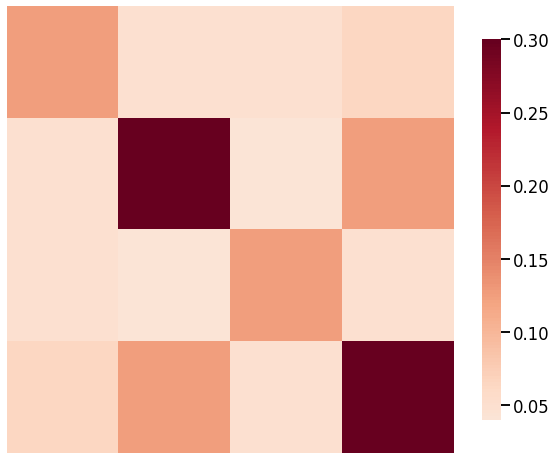

In [746]:
gp.plot.heatmap(B)

In [772]:
n = 1000
p = 0.25
pi = np.array([p, p, p, p])
A = gp.simulations.sbm((n*pi).astype(int), B)

affinity_labels = np.array(['L'] * (n//2) + ['R'] * (n//2)) #left right
core_labels = np.tile(["G"] * (n//4) + ["W"] * (n//4), 2) # gray white

n_components = 4

lse = gp.embed.LaplacianSpectralEmbed(n_components=n_components).fit_transform(
    gp.utils.augment_diagonal(A)
)
ase = gp.embed.AdjacencySpectralEmbed(n_components=n_components).fit_transform(A)

In [773]:
affinity = ['euclidean','manhattan','none']
# lse_gmm = gp.cluster.AutoGMMCluster(2, 2, affinity=affinity).fit_predict(lse)
# ase_gmm = gp.cluster.AutoGMMCluster(2, 2, affinity=affinity).fit_predict(ase)

lse_gmm = gp.cluster.GaussianCluster(2, 2).fit_predict(lse)
ase_gmm = gp.cluster.GaussianCluster(2, 2).fit_predict(ase)

In [774]:
adjusted_rand_score(lse_gmm, affinity_labels)

0.23366859892654293

In [775]:
adjusted_rand_score(lse_gmm, core_labels)

0.2656931460785293

In [776]:
adjusted_rand_score(ase_gmm, affinity_labels)

-0.0010020040080160175

In [777]:
adjusted_rand_score(ase_gmm, core_labels)

1.0

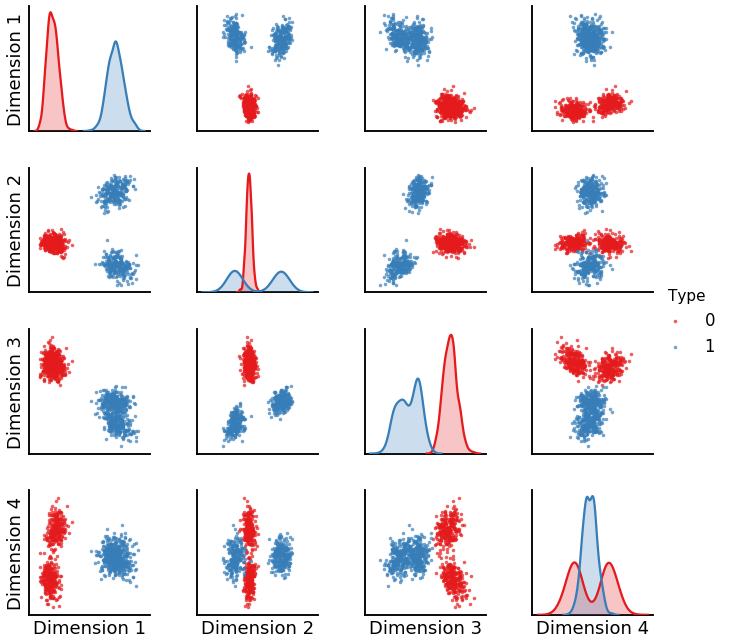

In [778]:
gp.plot.pairplot(ase, labels=ase_gmm)

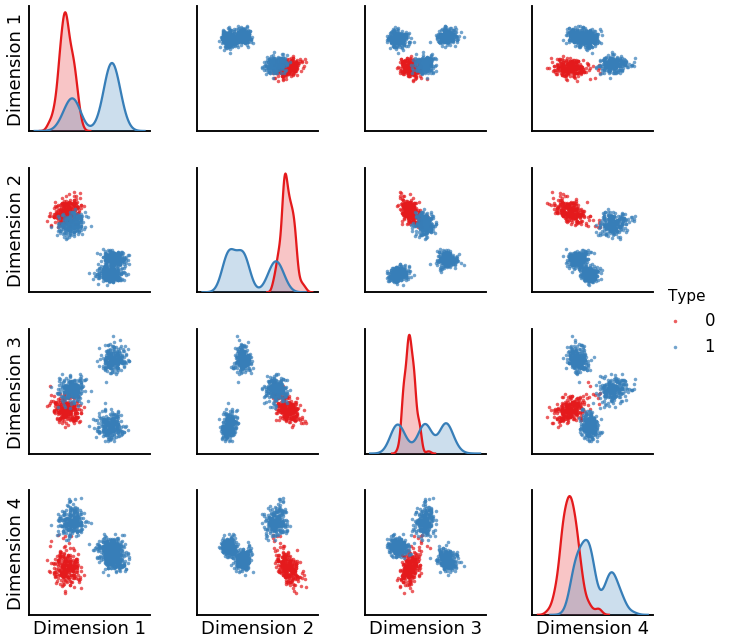

In [779]:
gp.plot.pairplot(lse, labels=lse_gmm)